In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


# Upload CSV File

In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data-01-sizeup.csv to data-01-sizeup (1).csv
User uploaded file "data-01-sizeup.csv" with length 93669 bytes


# Read CSV

In [33]:
import pandas as pd
import io

cols = ['title', 'order_type', 'hope_dt', 'hope_tm', 'is_revision', 'is_duple', 
'remained_hope_dt', 'prev_state', 'duple_state', 'curr_state','somf_ext_state', 'somf_ext_state_tm', 
'somf_inn_state_1', 'somf_inn_state_1_tm', 'somf_inn_state_2', 'somf_inn_state_2_tm', 
'pna_inn_state_1', 'pna_inn_state_1_tm', 'pna_inn_state_2', 'pna_inn_state_2_tm', 'output']


orders = pd.read_csv(io.StringIO(uploaded['data-01-sizeup.csv'].decode('utf-8')), names=cols, header=None)

orders.head()

,title,order_type,hope_dt,hope_tm,is_revision,is_duple,remained_hope_dt,prev_state,duple_state,curr_state,somf_ext_state,somf_ext_state_tm,somf_inn_state_1,somf_inn_state_1_tm,somf_inn_state_2,somf_inn_state_2_tm,pna_inn_state_1,pna_inn_state_1_tm,pna_inn_state_2,pna_inn_state_2_tm,output
0,internet_500m,new,20200602,11,0,0,8,NaN,NaN,1,idms_req,50.0,reco,40,wodi,40.0,prdi,40,NaN,NaN,fail
1,internet_500m,new,20200602,11,0,0,8,NaN,NaN,1,idms_req,50.0,reco,40,wodi,40.0,reco,40,wodi,40.0,succ
2,internet_500m,new,20200602,11,0,0,8,NaN,NaN,1,NaN,NaN,prdi,40,NaN,NaN,prdi,40,NaN,NaN,delay
3,internet_500m,new,20200602,11,0,0,8,NaN,NaN,1,NaN,NaN,prdi,3,NaN,NaN,prdi,3,NaN,NaN,succ
4,internet_500m,new,20200602,11,0,0,8,NaN,NaN,1,NaN,NaN,lord,40,NaN,NaN,phrd,40,NaN,NaN,fail


# 데이터 훑어보기

In [34]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1020 non-null   object 
 1   order_type           1020 non-null   object 
 2   hope_dt              1020 non-null   int64  
 3   hope_tm              1020 non-null   int64  
 4   is_revision          1020 non-null   int64  
 5   is_duple             1020 non-null   int64  
 6   remained_hope_dt     1020 non-null   int64  
 7   prev_state           0 non-null      float64
 8   duple_state          0 non-null      float64
 9   curr_state           1020 non-null   int64  
 10  somf_ext_state       340 non-null    object 
 11  somf_ext_state_tm    340 non-null    float64
 12  somf_inn_state_1     1020 non-null   object 
 13  somf_inn_state_1_tm  1020 non-null   int64  
 14  somf_inn_state_2     340 non-null    object 
 15  somf_inn_state_2_tm  340 non-null    f

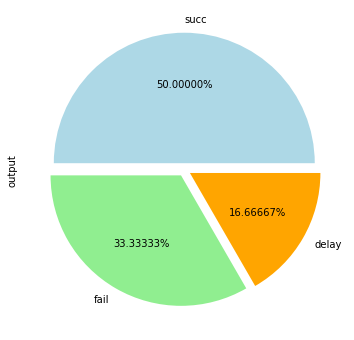

In [35]:
import matplotlib.pyplot as plt

plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

orders.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange'], explode=(0.05, 0.05, 0.05))

In [0]:
order_type = pd.get_dummies(orders.order_type,  prefix='order_type')
somf_ext_state = pd.get_dummies(orders.somf_ext_state,  prefix='somf_ext_state')
somf_inn_state_1 = pd.get_dummies(orders.somf_inn_state_1, prefix='somf_inn_state_1')
somf_inn_state_2 = pd.get_dummies(orders.somf_inn_state_2, prefix='somf_inn_state_2')
pna_inn_state_1 = pd.get_dummies(orders.pna_inn_state_1, prefix='pna_inn_state_1')
pna_inn_state_2 = pd.get_dummies(orders.pna_inn_state_2, prefix='pna_inn_state_2')

labels = pd.get_dummies(orders.output)


In [37]:
labels.head()

,delay,fail,succ
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [38]:
X = pd.concat([order_type, orders.is_revision, orders.is_duple, orders.curr_state, somf_ext_state, somf_inn_state_1, somf_inn_state_2, pna_inn_state_1, pna_inn_state_2] , axis=1)
X.head()

,order_type_new,is_revision,is_duple,curr_state,somf_ext_state_idms_req,somf_inn_state_1_lord,somf_inn_state_1_prdi,somf_inn_state_1_reco,somf_inn_state_2_wodi,pna_inn_state_1_lord,pna_inn_state_1_phrd,pna_inn_state_1_prdi,pna_inn_state_1_reco,pna_inn_state_2_wodi
0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,1,0,0,1,1,0,0,1,1,0,0,0,1,1
2,1,0,0,1,0,0,1,0,0,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,1,0,0,0


In [0]:
y = labels.values

# 훈련/테스트 데이터 분리

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# 모델 생성

In [68]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
  ])

  # model.compile(loss='categorical_crossentropy',
  #               optimizer='adam',
  #               metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

model = build_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 195       
Total params: 5,315
Trainable params: 5,315
Non-trainable params: 0
_________________________________________________________________


# 훈련

In [69]:
EPOCHS = 100

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 8ms/step - loss: 0.9078 - accuracy: 0.6871 - val_loss: 0.7246 - val_accuracy: 0.8300
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.8310 - val_loss: 0.4598 - val_accuracy: 0.8300
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8310 - val_loss: 0.3150 - val_accuracy: 0.8300
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8310 - val_loss: 0.2633 - val_accuracy: 0.8300
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.8310 - val_loss: 0.2456 - val_accuracy: 0.8300
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.8385 - val_loss: 0.2379 - val_accuracy: 0.8450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.8360 - val_loss: 0.2378 - val_accuracy: 0.8300
Epoch 8/100
2

# 검증

In [57]:
score = model.evaluate(X_train, y_train, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.8308
Test Score: 0.2332707792520523
Test Accuracy: 0.8308308124542236


In [70]:
example = X_train[10:20]
predictions = model.predict(example)

import numpy as np

np.argmax(predictions, axis=1) 

array([0, 0, 2, 1, 0, 0, 2, 2, 2, 1])

In [71]:
y_train[10:20]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()